In [34]:
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv('studPer.csv')
df

,x0,x1,y
0,7,9,91.0
1,4,4,65.0
2,8,7,45.0
3,5,5,36.0
4,7,8,66.0
...,...,...,...
9995,1,4,23.0
9996,7,8,58.0
9997,6,8,74.0
9998,9,7,95.0


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# @title
# Hidden
###

# Helper function to annotate a single point
def annotate_pt(text, xy, xytext, color):
  plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
  plt.annotate(text,xy=xy,xytext=xytext,
                # color=color,
                arrowprops=dict(arrowstyle="->",
                color = color,
                connectionstyle='arc3'))


# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts, f_val, vmin=None, vmax=None):
  if vmin == None:
    vmin = min(f_val)
  if vmax == None:
    vmax = max(f_val)

  f_plot = plt.scatter(pts[:,0],pts[:,1],
                        c=f_val,vmin=vmin,vmax=vmax,
                        cmap='RdBu_r')
  plt.colorbar(f_plot)
  # Show the optimal point
  #annotate_pt('global minimum',(0,0),(-5,-7),'yellow')


# Generates 2500 equally spaced points on a grid, and
# Computes the function value at each point
def visualize_fw(f, x_ran, y_ran):
  xcoord = np.linspace(x_ran[0], x_ran[1], 50)
  ycoord = np.linspace(y_ran[0], y_ran[1], 50)
  w1, w2 = np.meshgrid(xcoord, ycoord)
  pts = np.vstack( (w1.flatten(), w2.flatten()) )

  # All 2D points on the grid
  pts = pts.transpose()

  # Function value at each point
  f_vals = np.apply_along_axis( f, axis=1, arr=pts )

  # function is x^2
  #f_vals = np.sum(pts*pts, axis=1)
  #return f_vals
  function_plot(pts, f_vals)
  #plt.title('Objective Function Shown in Color')
  plt.show()
  return pts, f_vals


# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
def visualize_learning(pts, f_vals, w_history):

  # Make the function plot
  function_plot(pts, f_vals)

  # Plot the history
  plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta')

  # Annotate the point found at last iteration
  annotate_pt('Last Position',
              (w_history[-1,0],w_history[-1,1]),
              (-1,7),'green')
  iter = w_history.shape[0]
  for w,i in zip(w_history,range(iter-1)):
    # Annotate with arrows to show history
    plt.annotate("",
                xy=w, xycoords='data',
                xytext=w_history[i+1,:], textcoords='data',
                arrowprops=dict(arrowstyle='<-',
                        connectionstyle='angle3'))

In [48]:
# input
## x_0. integer
## x_1. integer
def predict_performance(x0, x1):
    return (6*x0) + (80*x1) + 55

In [49]:
#example
predict_performance(25, 0.3)

229.0

In [50]:
# input
## x. array, x[0] is x_0 and x[1] is x_1
def predict_performance(x,y):
    return (6*x) + (70*y) + 30
  # alternative with numpy

In [43]:
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# order hour on 9:00 AM ~ 21:00 PM, and inflation rate on 0 ~ 1
pts, f_vals = visualize_fw(predict_performance, [9, 21], [0, 1])
# pts are the points
# f_vals are function values on the points

TypeError: predict_performance() missing 1 required positional argument: 'y'

In [22]:
# X0 is studied hours
# X1 is sleeping hours

x0 = df.iloc[:, 0].values
x1=df.iloc[:,1].values
y=X = df.iloc[:, 2].values

In [23]:
def add(x0,x1):
    return x0+x1;

In [24]:
x=add(x0,x1)
x

array([16,  8, 15, ..., 14, 16, 15])

In [25]:

def predict_performance(x):
    return 8*x+50

In [26]:
y_predicted=predict_performance(x)

In [27]:
y_predicted

array([178, 114, 170, ..., 162, 178, 170])

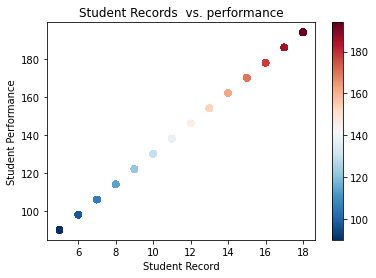

In [28]:
import numpy as np
import matplotlib.pyplot as plt


# Plot the function
def function_plot(pts, f_val, vmin=None, vmax=None):
    if vmin is None:
        vmin = min(f_val)
    if vmax is None:
        vmax = max(f_val)

    f_plot = plt.scatter(pts[:,0], pts[:,1],
                         c=f_val, vmin=vmin, vmax=vmax,
                         cmap='RdBu_r')
    plt.colorbar(f_plot)

# Generate points and evaluate the function
def visualize_yield(x):
    # Model watermelon yield based on irrigation levels
   # yield_values = -0.5 * (irrigation_levels - 5)**2 + 10
    y_predicted=predict_performance(x)
    # Reshape for plotting
    pts = np.column_stack((x, y_predicted))
    
    # Plot the function
    function_plot(pts, y_predicted)
    plt.xlabel('Student Record')
    plt.ylabel('Student Performance')
    plt.title('Student Records  vs. performance')
    plt.show()

x=add(x0,x1)
visualize_yield(x)

